In [12]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


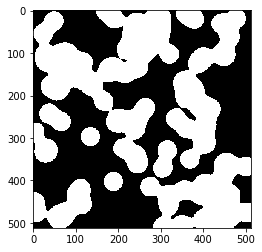

In [13]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

image = data.binary_blobs()
plt.imshow(image, cmap='gray')

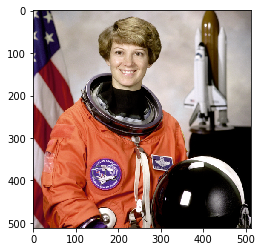

In [14]:
image = data.astronaut()

plt.imshow(image)

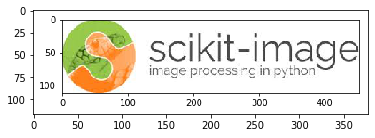

In [15]:
from skimage import io
image = io.imread('skimage_logo.png')
plt.imshow(image);

In [16]:
images = io.ImageCollection('C:/Users/shmue/*.png')

In [17]:
print('Type:', type(images))
images.files


Type: <class 'skimage.io.collection.ImageCollection'>


['C:/Users/shmue\\logo.png', 'C:/Users/shmue\\skimage_logo.png']

In [18]:
io.imsave('logo.png', image)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [20]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f90b5198c8>)

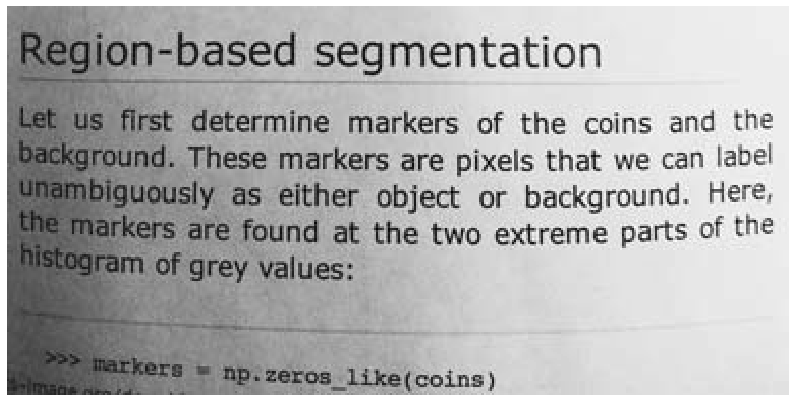

In [21]:
text = data.page()
image_show(text)

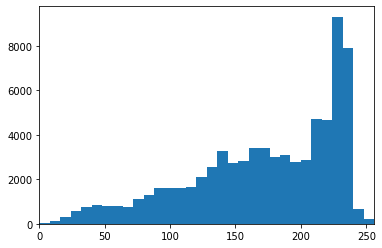

In [22]:
fig, ax = plt.subplots(1,1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

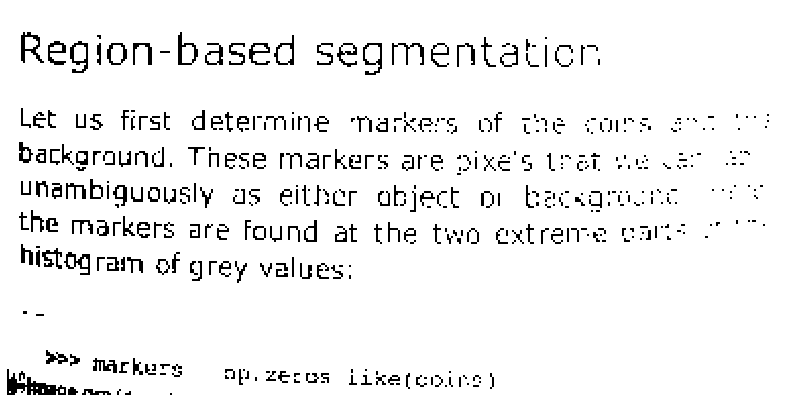

In [23]:
text_segmented = text > ( 65)
image_show(text_segmented);

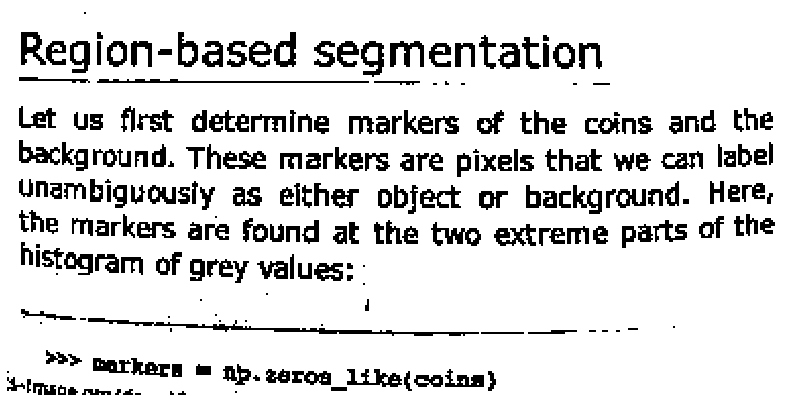

In [24]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10)
image_show(text > text_threshold);

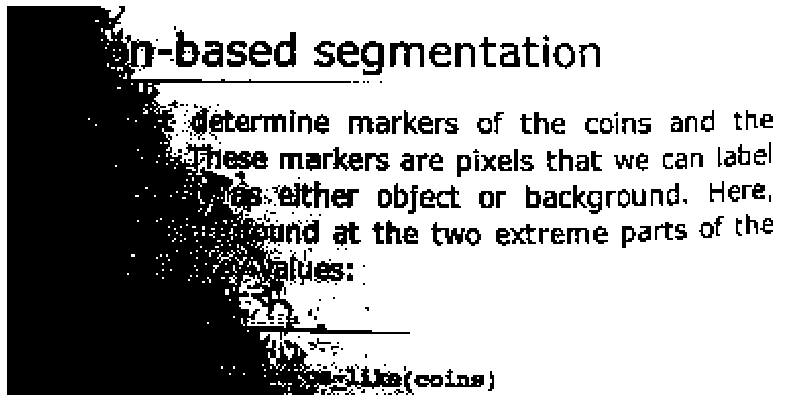

In [25]:
text_threshold = filters.threshold_otsu(text)
image_show(text > text_threshold);

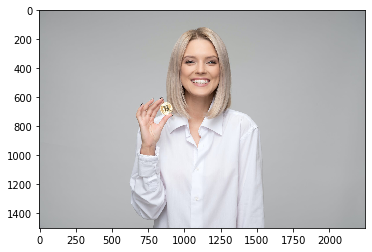

In [26]:
# import the image
from skimage import io
image = io.imread('girl.jpg') 
plt.imshow(image);

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f90be522c8>)

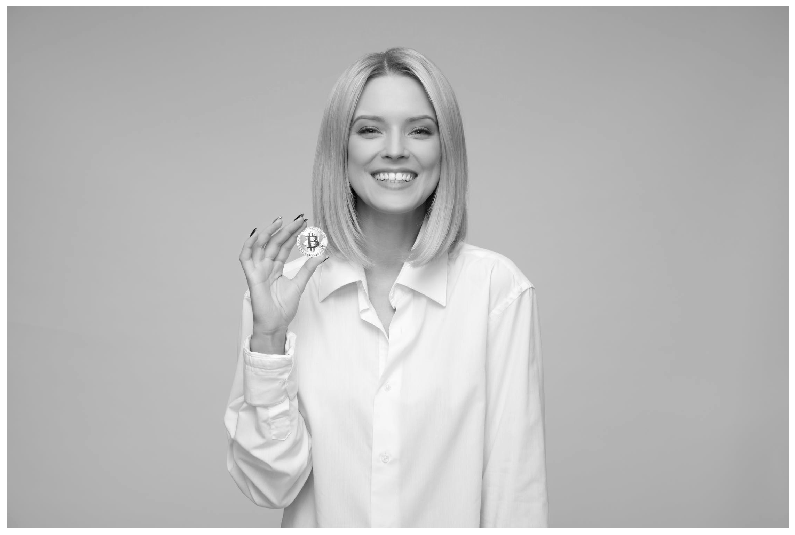

In [27]:
image_gray = color.rgb2gray(image)
image_show(image_gray)

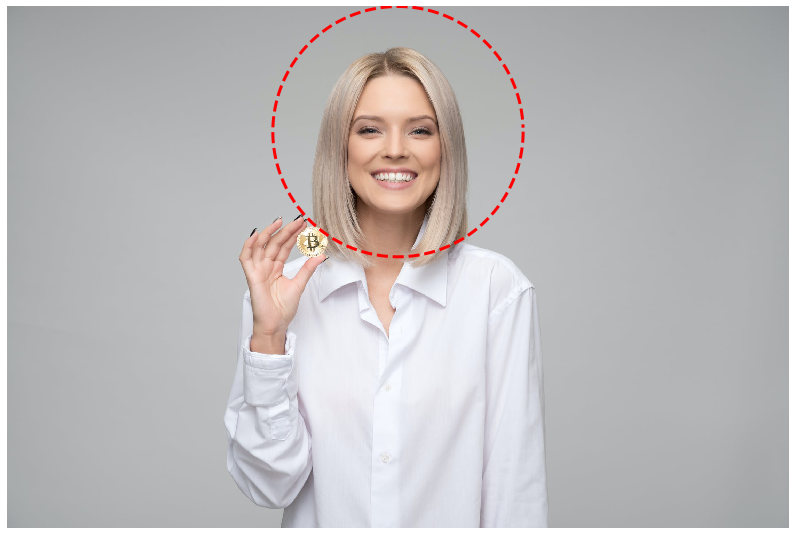

In [42]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    
    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

points = circle_points(200, [360, 1123.5], 360)[:-1]

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

C:\Users\shmue\anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


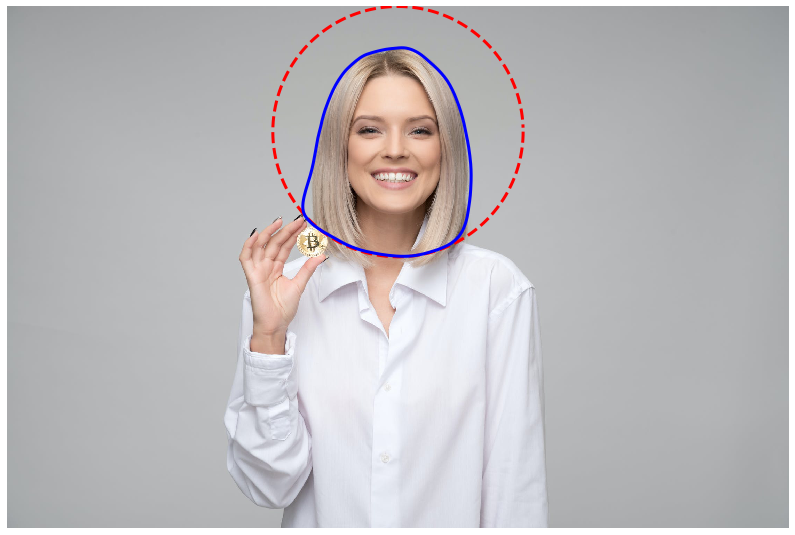

In [43]:
snake = seg.active_contour(image_gray, points)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);


In [ ]:
snake = seg.active_contour(image_gray, points, alpha=0.06, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
snake = seg.active_contour(image_gray, points, alpha=0.2, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
snake = seg.active_contour(image_gray, points, alpha=0.02, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
snake = seg.active_contour(image_gray, points, alpha=0.005, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
snake = seg.active_contour(image_gray, points, alpha=0.01, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
snake = seg.active_contour(image_gray, points, alpha=0.025, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [31]:
snake = seg.active_contour(image_gray, points, alpha=0.035, beta= 0.3)

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

C:\Users\shmue\anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f90b83ec48>)

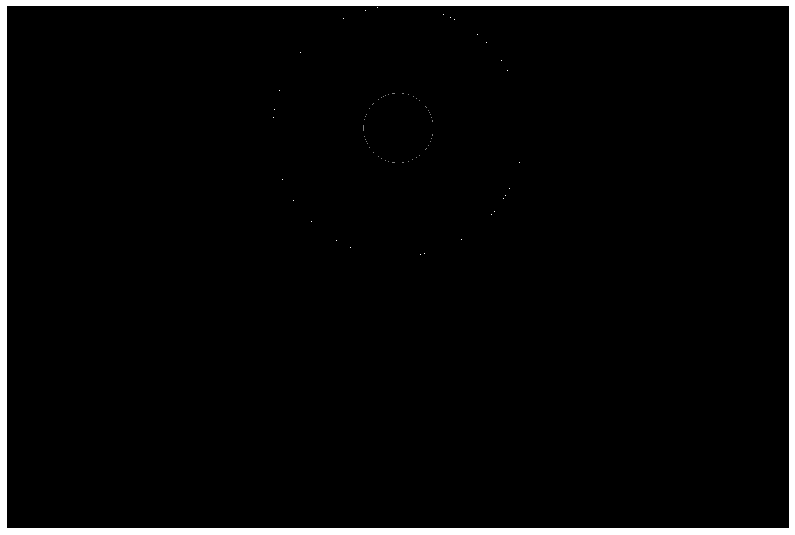

In [38]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

indices = draw.circle_perimeter(350, 1124, 100)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2

image_show(image_labels)

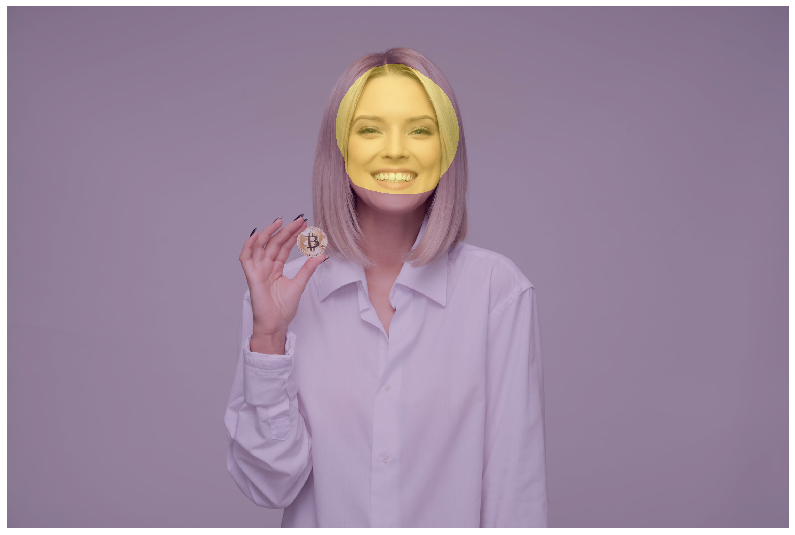

In [44]:
image_segmented = seg.random_walker(image_gray, image_labels)

fig, ax = image_show(image)
ax.imshow(image_segmented ==1, alpha = 0.3)

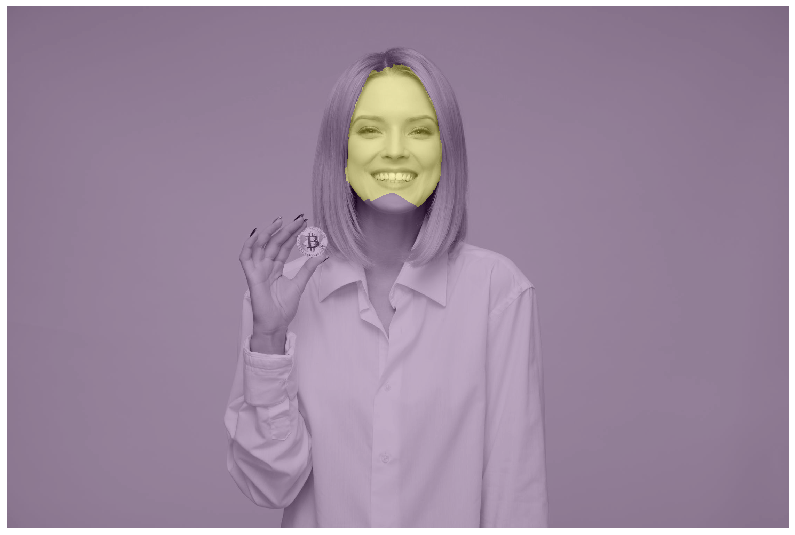

In [40]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

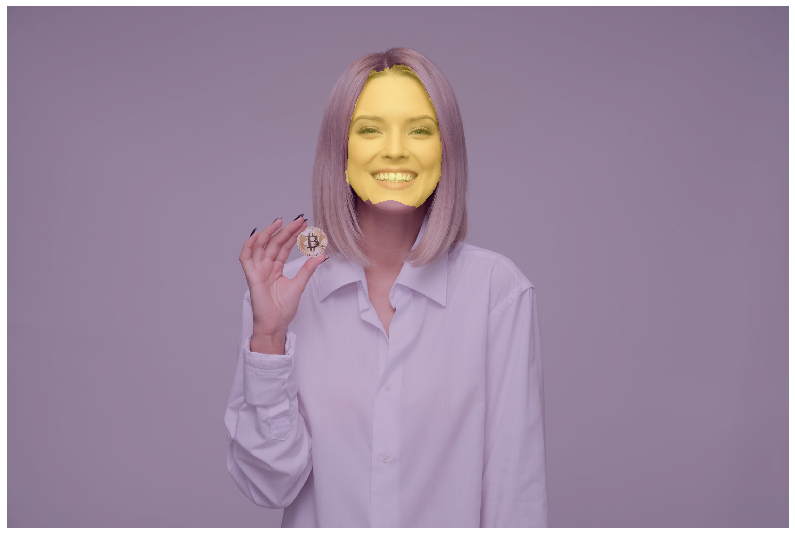

In [47]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 4000)
# Check our results
fig, ax = image_show(image)
ax.imshow(image_segmented == 1, alpha=0.3);

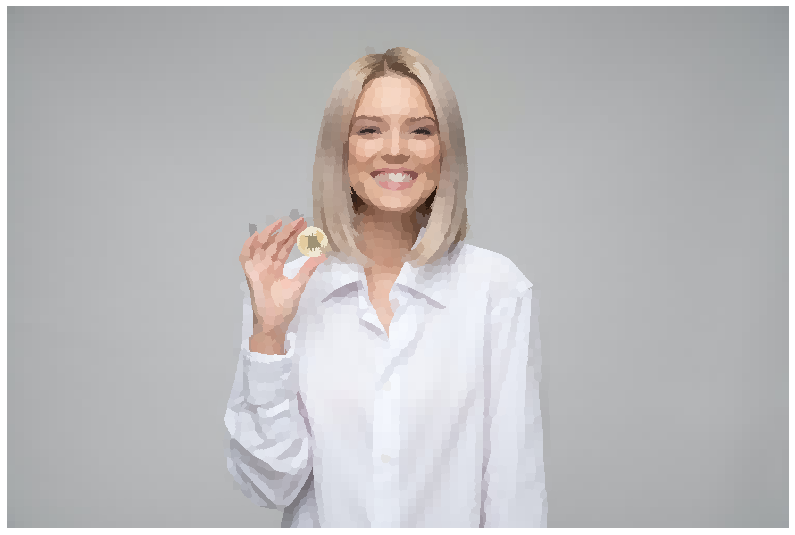

In [50]:
image_slic = seg.slic(image,n_segments=6000)
image_show(color.label2rgb(image_slic, image, kind='avg'));

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9167af888>)

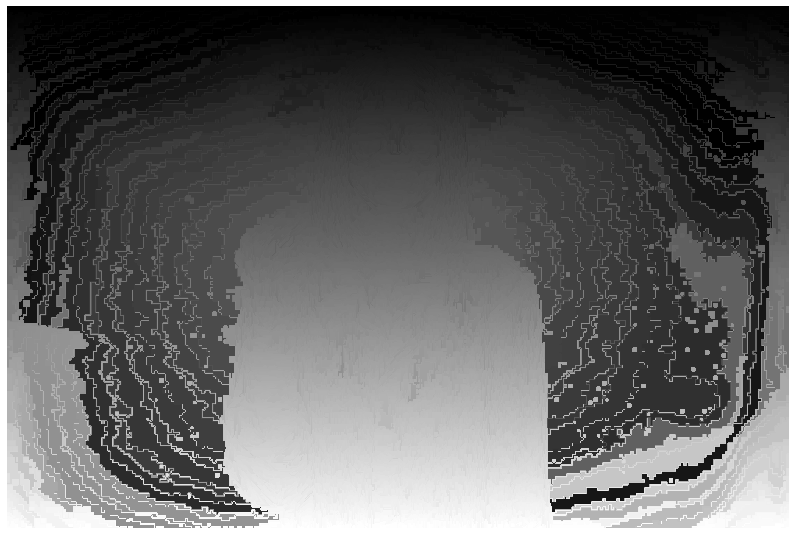

In [57]:
image_felzenswalb = seg.felzenszwalb(image)
image_show(image_felzenswalb)

In [58]:
np.unique(image_felzenswalb).size

25408

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f916b80f88>)

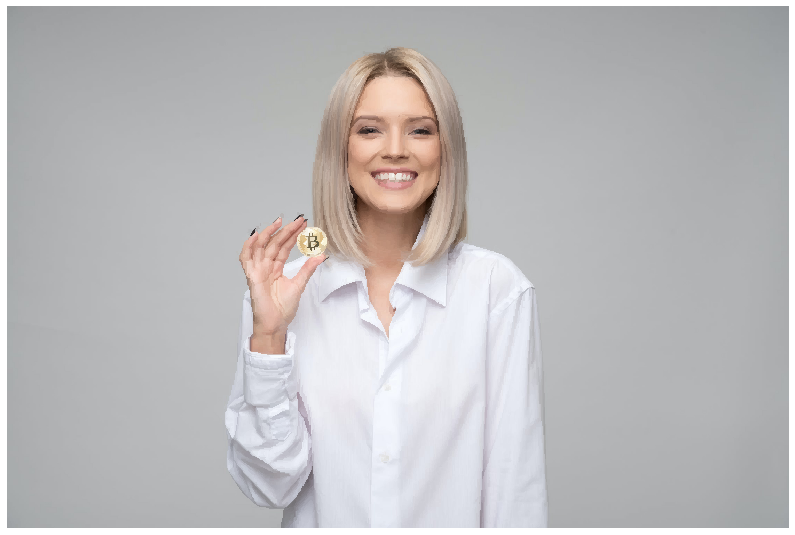

In [59]:
image_felzenswalb_colored = color.label2rgb(image_felzenswalb, image, kind='avg')

image_show(image_felzenswalb_colored)